# More probability distributions, more stories

In the previous chapter, we introduced 4 foundational distributions, along with their statistical stories.


We'll now dive into a variety of other distributions that you're likely to find useful in your statistical journeying. Do feel free to jump to the next chapter and come back to them, when necessary.

Once again, for each distribution, we'll introduce

* the story,
* the parameters, and
* how to simulate it (which will include plotting histograms and ECDFs of our simulated data).

We'll then show real-world examples of each distribution, when possible, and demonstrate how to fit the simulated model the empirical data. We'll also occasionally use our simulation skills to give us more insight into the distributions we're introducing.

## The Exponential distribution

### The Exponential story

We've encountered a variety of named _discrete distributions_. There are also named _continuous distributions_, such as the exponential distribution and the normal (or Gaussian) distribution. To see what the story of the exponential distribution is, let's return to Poissonville, in which the number of buses that will arrive per hour are Poisson distributed.
However, the **waiting time between arrivals of a Poisson process are exponentially distributed.**

So the exponential distribution has the following story: the waiting time between arrivals of a Poisson process are exponentially distributed. 

### The parameter(s)

The exponential distribution has a single parameter, the mean waiting time. This distribution is not peaked, as we can see from its PDF. 

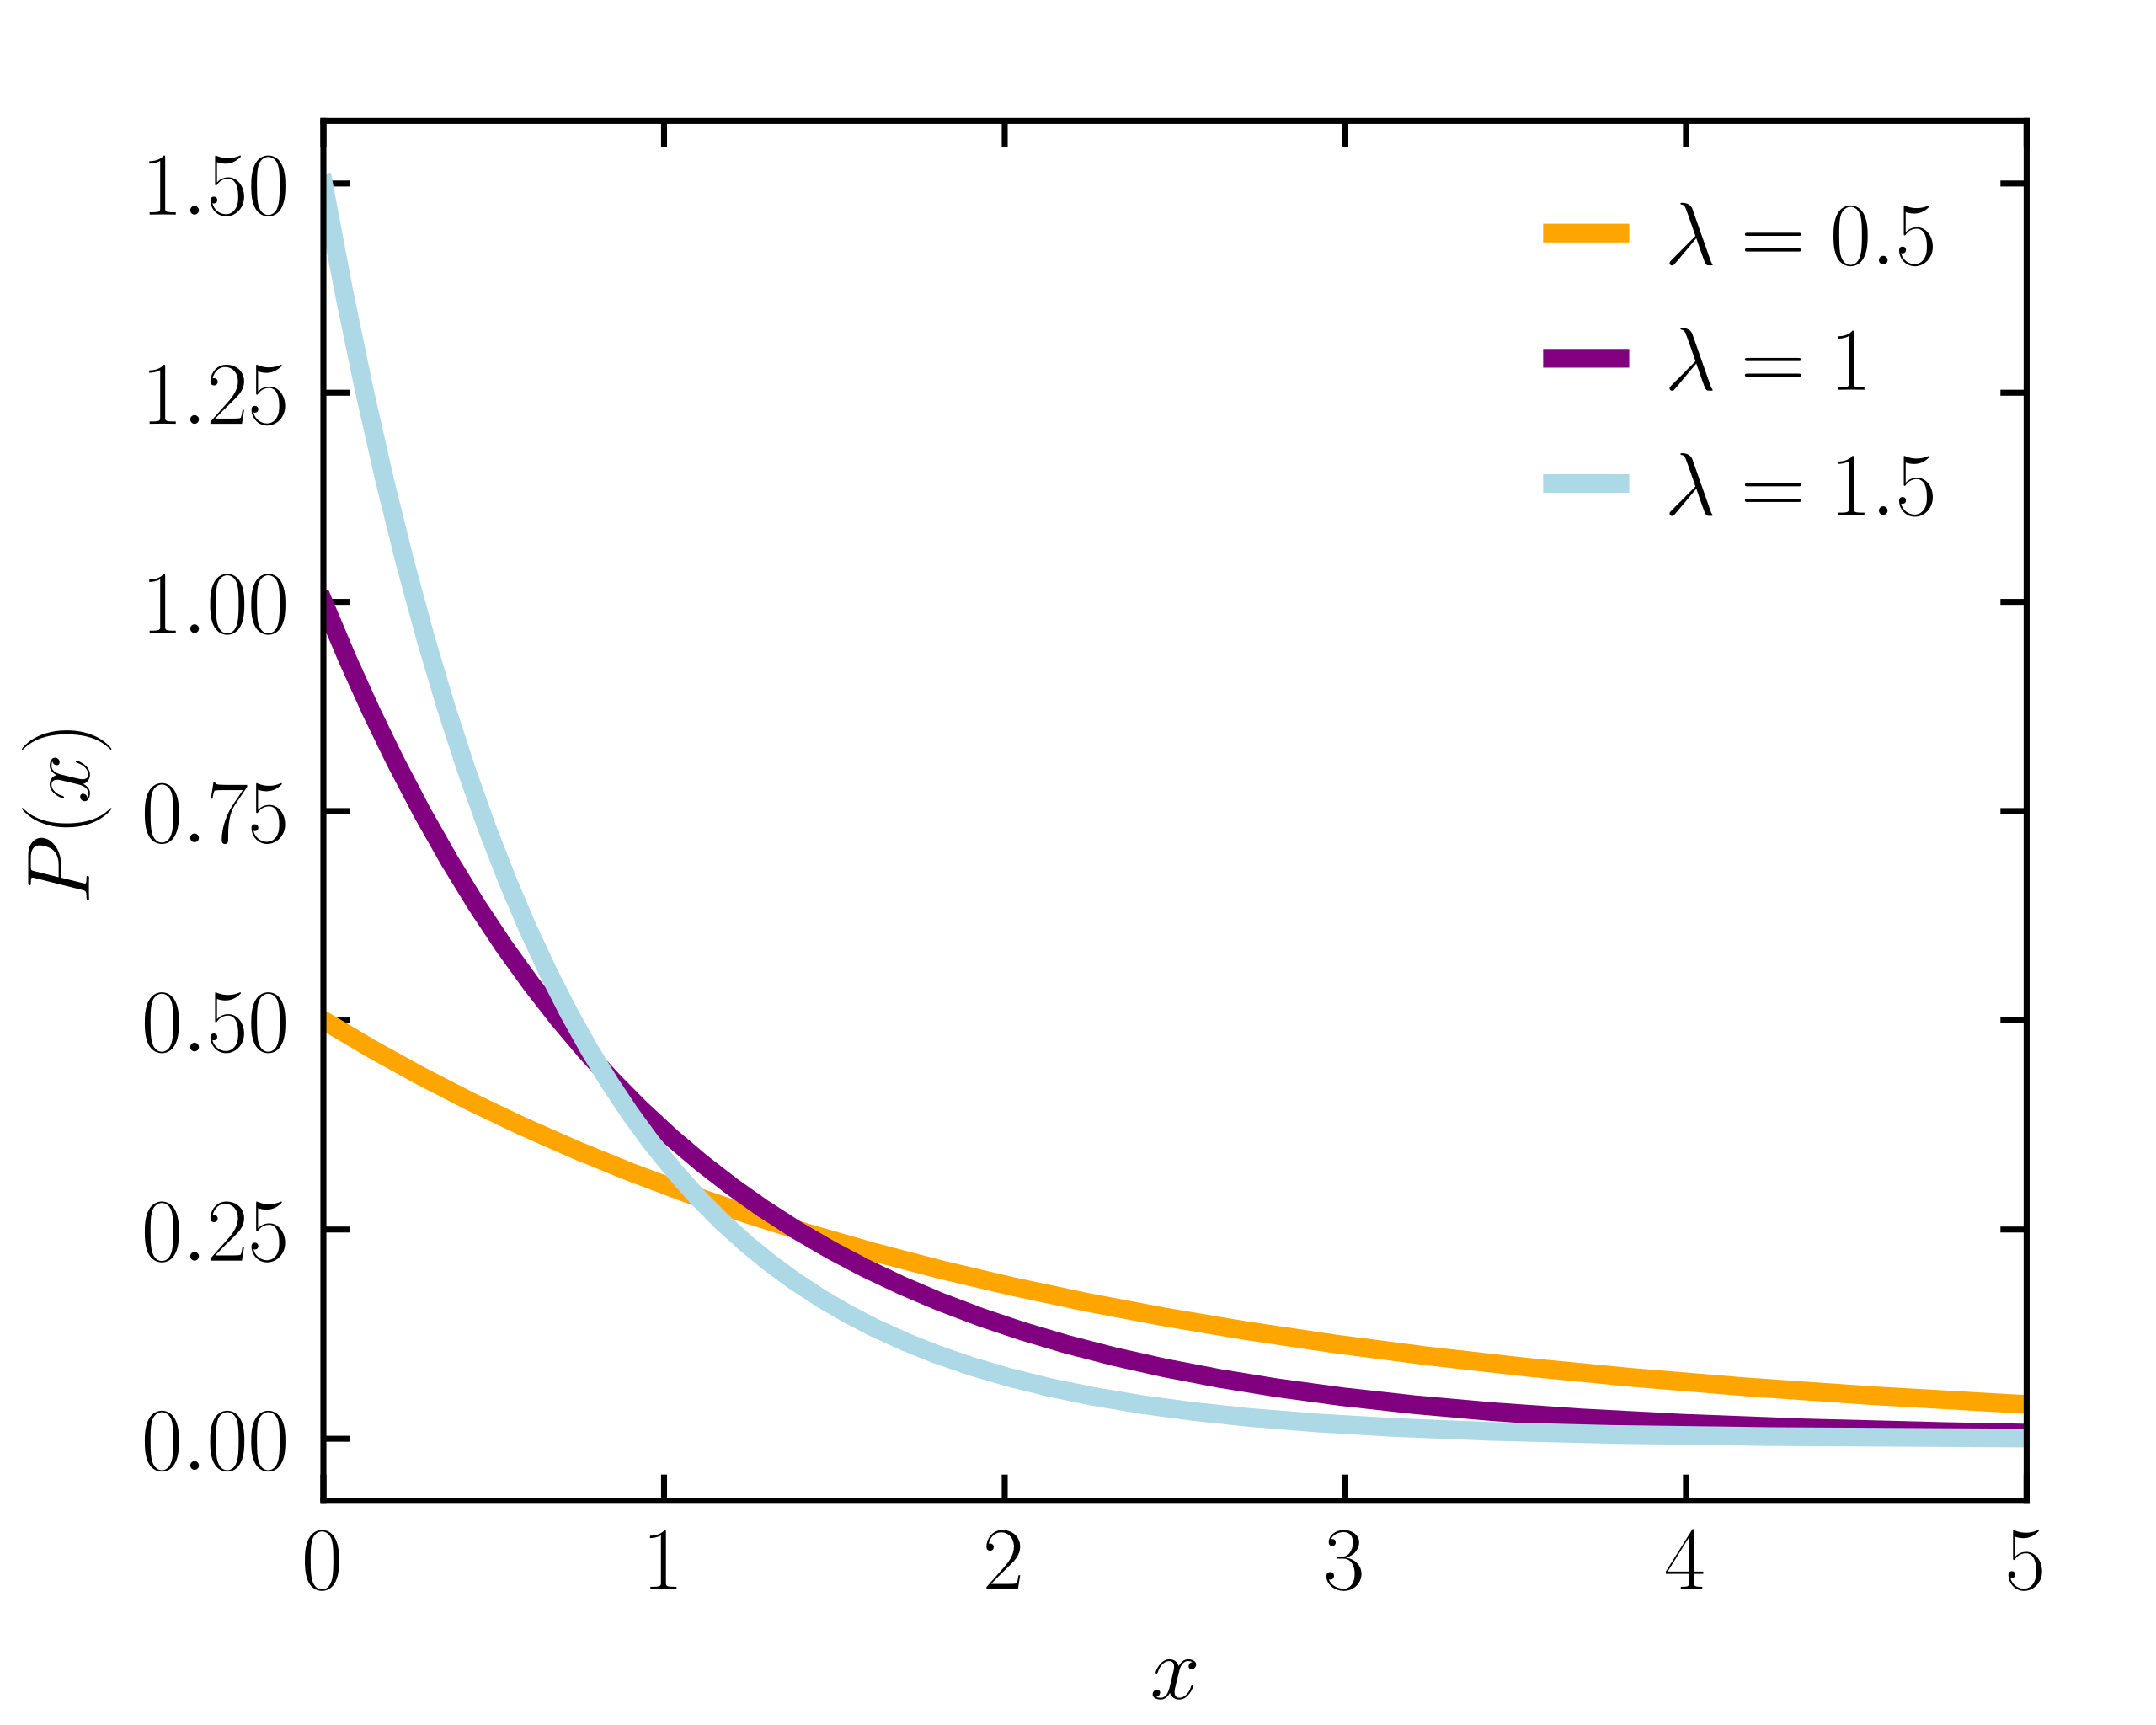

In [1]:
#| echo: false
from IPython.display import Image
Image("../../img/Exponential_probability_density.png")


### Simulating the exponential distribution


Let's now simulate some exponentially distributed data and plot the resulting histogram:

In [2]:
#| output: false
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize
from generative_thinking.utils import ecdf
%matplotlib inline
sns.set()

/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


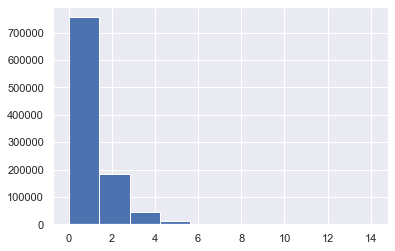

In [3]:
rng = np.random.default_rng(42)
samples = rng.exponential(1, size=10**6)
plt.hist(samples);

### The ECDF for the Exponential distribution

Let's also plot the ECDF:

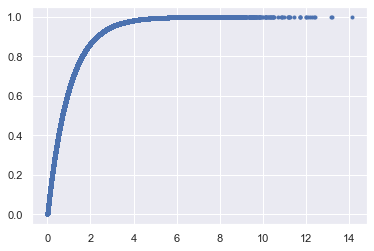

In [4]:
x, y = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none');

### An example of the exponential distribution

For an illustrative example, lets check out the time between all incidents involving nuclear power since 1974. It's a reasonable first approximation to expect incidents to be well-modeled by a Poisson process, which means the timing of one incident is independent of all others. If this is the case, the time between incidents should be exponentially distributed.


To see if this story is credible, we can plot the ECDF of the data with the CDF that we'd get from an exponential distribution with the sole parameter, the mean, given by the mean inter-incident time of the data.

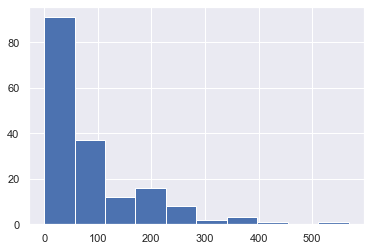

In [5]:
# Load nuclear power accidents data & 
# create array of inter-incident times
df = pd.read_csv('../../datasets/nuclear_power_accidents.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df.Date >= pd.to_datetime('1974-01-01')]
inter_times = np.diff(np.sort(df.Date)).astype(float) / 1e9 / 3600 / 24
plt.hist(inter_times);

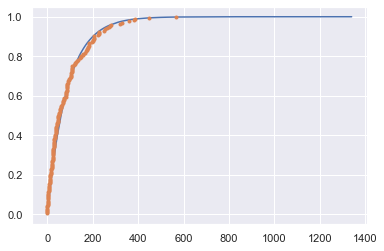

In [6]:
# Compute mean and sample from exponential
mean = np.mean(inter_times)
samples = rng.exponential(mean, size=10**6)

# Compute ECDFs for sample & model
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)

# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none');

We see that the data is close to being exponentially distributed, which means that we can model the nuclear incidents as a Poisson process.


### Simulating relationships between distributions: the exponential and the uniform 

We'll soon use our simulation skills to demonstrate the relationship between the exponential and Poisson distributions. Before this, however, let's show how the exponential and uniform distributions are related (this will be useful in demonstrating the former).

For a uniformly distributed unknown quantity $X$, there is a corresponding exponentially distributed unknown quantity $Y \sim - ln(X).$ We'll demonstrate this by simulating $X$, taking the log and scaling accordingly:

In [7]:
# Simulate X
lam = 15
x = rng.random(100)
y = -(1./lam)*np.log(x)

We then fit an exponential model to the data generated and plot the ECDFs of both the data and the model:

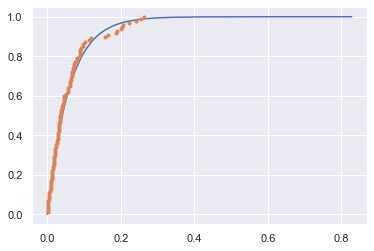

In [8]:
# Compute mean and sample from exponential
mean = np.mean(y)
samples = rng.exponential(mean, size=10**6)

# Compute ECDFs for sample & model
x, y = ecdf(y)
x_theor, y_theor = ecdf(samples)

# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none');

### Simulating relationships between distributions: the Poisson and the exponential

Having seen a concrete example and also the relationship between the exponential and uniform distribution, let's now dive in and simulate the relationship between the Poisson and exponential distributions. To do this, 

* we initialize the number of Poisson events to -1
* generate an exponential unknown quantity $E$
* increment the number of Poisson events by 1
* repeat until the cumulative sum of all $E$ s is greater than 1 (encoded in the `while` loop).

In [9]:
lam = 15
T = 0
n = -1
while T < 1:
    #generate exponential random variable
    E=-(1./lam)*np.log(rng.random(1)); 
    T=T+E; #update sum of exponential variables
    n=n+1; #update number of events
print(n)

18


The result should be a Poisson distributed variable. We've generated one instance of the unknown quantity in the above and now we'll generate many of them (using a `for` loop), fit a Poisson model, and plot the ECDFs of both the data and the model fit:

In [10]:
N = []

for i in range(0,1000):
    T = 0
    n = -1
    while T < 1:
        E=-(1./lam)*np.log(rng.random(1)); #generate exponential random variable
        T=T+E; #update sum of exponential variables
        n=n+1; #update number of exponential variables
    #print(n)
    N.append(n)   

np.mean(N)

15.011

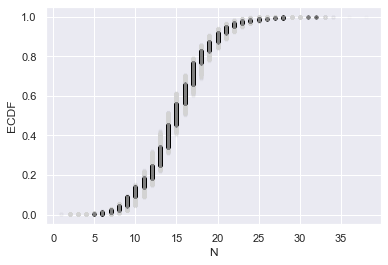

In [11]:
# Generate x & y data for ECDF
x_ecdf, y_ecdf = ecdf(np.array(N))

# Number of times we simulate the model
n_reps = 1000

# Plot ECDF of data
plt.plot(x_ecdf, y_ecdf, '.', color='black');

# Plot ECDF of model
for _ in range(n_reps):
    samples = rng.poisson(np.mean(N), size=len(N))
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');


# Label your axes
plt.xlabel('N')
plt.ylabel('ECDF');

### Simulating relationships between distributions: the exponential and the binomial

As we've seen, the exponential distribution is related to the Poisson distribution, which in turn is related to the binomial distribution. In the spirit of fully utilizing our simulation skills, we'll now directly demonstrate the relationship between the exponential and binomial distributions. To do so, we'll 

* generate our Bernoulli trials
* identify at what times the Bernoulli events occur (the numpy array indexes that have value 1)
* compute the waiting times, that is, the differences between these times
* plot the histogram

As $p$ is small, these Bernoulli trials will result in Poisson events and the waiting times should be exponentially distributed.

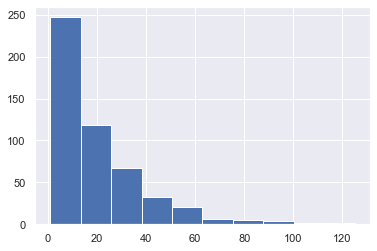

In [12]:
# Compute and plot the waiting times from Bernoulli trials
bts = np.random.binomial(1, 0.05, 10**4)
times = np.where(bts == 1)
wt = np.diff(times[0]).astype(float)
plt.hist(wt);

That looks possibly exponential but a more appropriate eye-test is to plot the ECDF of the data with the ECDF of a fitted exponential model:

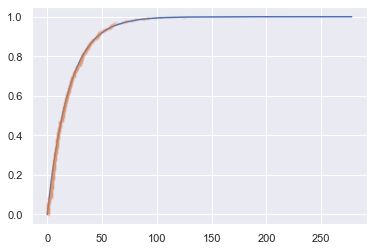

In [13]:
# Compute mean and sample from exponential
mean = np.mean(wt)
samples = np.random.exponential(mean, size=10**6)

# Compute ECDFs for sample & model
x, y = ecdf(wt)
x_theor, y_theor = ecdf(samples)

# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.1);

And our simulated data looks exponentially distributed!

## The Gamma Distribution

### The story

We have seen that Poisson distributions can be used to model single-step processes. However, there are many real-world processes that require multiple steps to occur, such as genetic expression, rainfall, and getting an insurance claim filled. Enter the Gamma distribution. They come up a lot in biology, for example, the time between spiking, or firing, of a neuron.

The **story** of the Gamma distribution is the amount of time we have to wait for the arrival two Poisson processes is gamma distributed. More generally, the amount of time we have to wait for $k$ (or $\gamma$) Poisson processes to arrive is gamma distributed.


Before jumping in to the Gamma distribution, note that

* Gamma need not be an integer
* When $\gamma = 1$, we retrieve the exponential distribution
* The Gamma is peaked.


### The parameters


The Gamma distribution is defined by a shape parameter $k$ and a scale parameter $\theta.$ The shape $k$ can be thought of as the number of steps required and the scale $\theta$ as the inverse of the rate parameter $\beta.$


### Simulating the Gamma distribution

We can simulate the gamma distribution using `rng.gamma()` and plot the resulting histogram to see the peak:

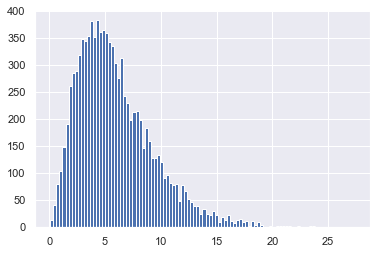

In [14]:
g_data = rng.gamma(3, 2, 10**4)
plt.hist(g_data, bins=100);

### The ECDF for the Gamma distribution

We also now plot the ECDF of our simulated data:

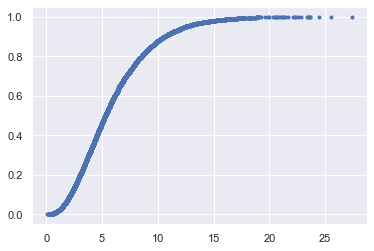

In [15]:
x, y = ecdf(g_data)

plt.plot(x, y, marker='.', linestyle='none');

We can also use `scipy.stats` to fit a gamma model to the data we just simulated and plot both ECDFs. We do so in order to demonstrate the method and to double check that our simulation process worked as we think:

3.0174566424863496 -0.03591188164295 1.9885784405903286


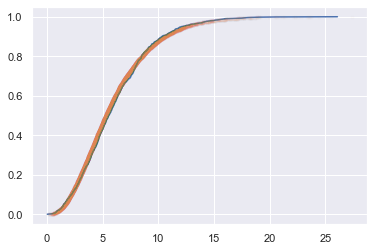

In [16]:
import scipy.stats as stats 
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(g_data)
print(fit_alpha, fit_loc, fit_beta)

# Compute mean and sample from exponential
samples = np.random.gamma(fit_alpha, fit_beta, size=10**3)

# Compute ECDFs for sample & model
x, y = ecdf(g_data)
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.01);

### An example of the Gamma distribution

One of your authors used to work in biophysics and cell biology, thinking a lot about cytoskeletal dynamics (the cytoskeleton can be thought of as the dynamic railway track of cells!). In particular, he researched microtubules (MTs), which are cytoskeletal polymers, key to many cellular functions, such as the formation of the mitotic spindle. Microtubules switch between periods of steady growth and rapid collapse and the switch from the former to the latter is referred to as _microtubule catastrophe_.

For a long time, it was considered dogma that microtubule catastrophe was a single-step (Poisson) process and so an exponenttial distribution was used to model the time it took for MTs to catastrophe. And then, in 2013, some of his colleagues realized that a Gamma distribution may be a more appropriate model and [wrote a paper demonstrating that MT catastrophe is in fact a multistep process](https://www.cell.com/fulltext/S0092-8674(11)01287-6)!

Let's now import the dataset and see whether a Gamma distribution looks like a good fit.

In [17]:
data_14 = pd.read_csv('../../datasets/microtubules_14.csv',header=None)[0]
data_14.head()

0     60
1     75
2     75
3     85
4    115
Name: 0, dtype: int64

3.342652806181448 1.0146015528754604 139.8577998935649


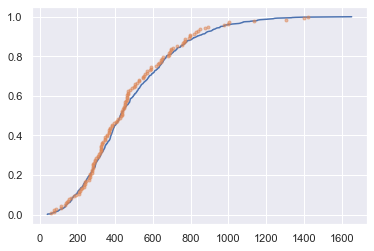

In [18]:
import scipy.stats as stats 
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data_14)
print(fit_alpha, fit_loc, fit_beta)

# Compute mean and sample from exponential
samples = rng.gamma(fit_alpha, fit_beta, size=10**3)

# Compute ECDFs for sample & model
x, y = ecdf(np.array(data_14))
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.5);

This does look good! What's more is that this result then led to a flurry of research to decipher what the constituent parts of this multistep process could be.

### Simulating relationships between distributions: Gamma from first principles

We have simulated the gamma distribution using the out-of-the-box function `rng.gamma().` Once again, it will be instructive to simulate it from first principles using the story of the distribution itself:

> the amount of time we have to wait for $k$ (or $\gamma$) Poisson processes to arrive is gamma distributed.

So what we do is we

* Generate many Poisson events using `rng.binomial()`
* identify at what times the Bernoulli events occur (the numpy array indexes that have value 1)
* compute the waiting times between each 3rd event

These waiting times should be gamma distributed.


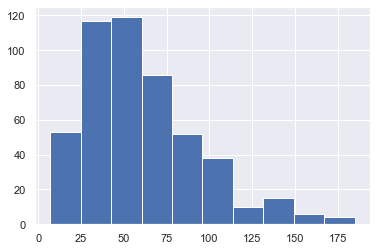

In [19]:
bts1 = rng.binomial(1, 0.05, 10**7)
events = np.where(bts1 == 1)

times = np.diff(events[0]).astype(float)
t = times[:1500].reshape(500,3)
waiting_times = np.sum(t, axis=1)
#yoi = np.diff(times[0][2::3])
plt.hist(waiting_times);

2.868961091573543 4.324370801765211 19.75405287669441


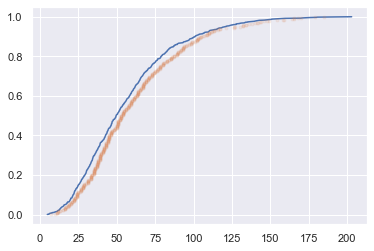

In [20]:
import scipy.stats as stats 
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(waiting_times)
print(fit_alpha, fit_loc, fit_beta)

# Compute mean and sample from exponential
samples = rng.gamma(fit_alpha, fit_beta, size=10**3)

# Compute ECDFs for sample & model
x, y = ecdf(waiting_times)
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.1);

## Negative Binomial Distribution

### The Negative Binomial Story

Often we may want to model the number of failures we encounter before a success in a series of Bernoulli trials, for example, if we want to know how many times we need to drill in a particular location before hitting oil, or how many times bursty gene expression will happen before it stops. The negative binomial distribution encodes this process by matching the following story:

> We perform a series of Bernoulli trials with probability β/(1+β) of success. The number of failures, y, before we get α successes is Negative Binomially distributed. 

The negative binomial is related to many other distributions. For example,

- it arises as as combination of gamma and Poisson distributions and hence is sometimes referred to as a Gamma-Poisson distribution;
- it can be modelled as a sum of geometrically distributed unknown quantities, among other things (we'll meet the geometric distribution next).

The [Wikipedia page for the negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) is an enlightening resource with respect to these relationships.


### The parameters

There are two parameter, $\beta$ and $\alpha$, as described above. In the wild, you may also see the negative binomial parametrized by $r>0$ and $p\in [0, 1],$ where $r$ is the number of successes $\alpha$ and $p$ is the probability of failure in each trial.


### Simulating the negative binomial distribution

Let's now simulate the negative binomial distribution and plot the resulting histogram:

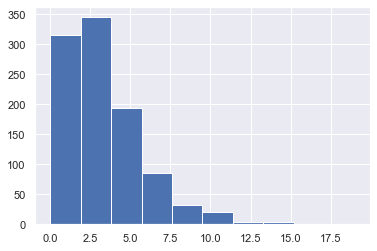

In [21]:
samples = rng.negative_binomial(3, 0.5, 10**3)
plt.hist(samples);

### The ECDF of the negative binomial distribution

Let's now plot the ECDF of our simulated data:

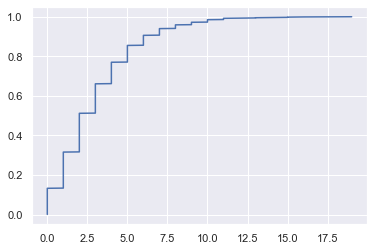

In [22]:
x, y = ecdf(samples)

plt.plot(x, y);

### Relationships between distributions: the negative binomial from first principles


Let's now simulate the negative binomial for $\alpha=3$ from first principles in order to see it in action. To do this, let's recall the negative binomial story:

- we simulate a series of Bernoulli trails;
- we count the number of failures before 3 successes.

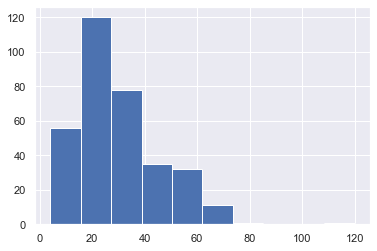

In [23]:
bts = np.random.binomial(1, 0.1, 10**4)
events = np.where(bts == 1)

# count the number of failures before 3 successes
data1 = events[0][2::3]
data = np.diff(data1).astype(float)
plt.hist(data);

Now let's fit a negative binomial distribution to our data generated by first principles.
For previous examples, we've used `scipy.stats` to fit distributions but, at the time of writing, there was no such method for the negative binomial so we opted to hand code our own. If can you follow the code below, that's great but, if not, it's totally cool.

In [24]:
# To do the fit, define log likelihood function
def log_like(params, n):
    """Log likelihood for i.i.d. NBinom measurements."""
    alpha, beta = params

    if alpha <= 0 or beta <= 0:
        return -np.inf

    return np.sum(stats.nbinom.logpmf(n, alpha, beta / (1 + beta)))

# Get MLE by optimization, have to minimize NEGATIVE log likelihood
res = scipy.optimize.minimize(
        fun=lambda params, n: -log_like(params, n),
        x0=np.array([1, 1]),
        args=(data,),
        method='Powell'
    )

# Extract and print result
alpha_mle, beta_mle = res.x
print(f'MLEs\n alpha: {alpha_mle}\n beta: {beta_mle}')

MLEs
 alpha: 4.027204119629421
 beta: 0.1349167978498449


We'll now sample from the negative binomial with these fitted parameters and we'll plot the histogram of the sampled data.
After this, we'll plot the ECDFs of the orignal data (generated from first principles) and the sampled data to make sure that it passes the ECDF eye-test!

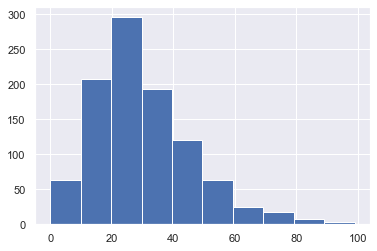

In [25]:
samples = rng.negative_binomial(alpha_mle, 
        beta_mle / (1 + beta_mle), 10**3)
plt.hist(samples);

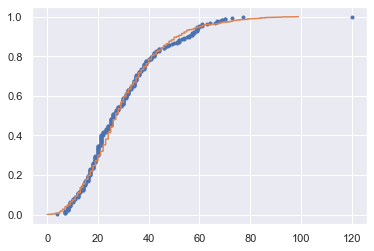

In [26]:
# Compute ECDFs for sample & model
x, y = ecdf(data)
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x, y, marker='.', linestyle='none');
plt.plot(x_theor, y_theor);


## Geometric Distribution

### The geometric story



A special case of the negative binomial distribution is the geometric distribution, which gives the number of failures before a single success. This is the negative binomial distribution with $\alpha=1.$ To be precise, the story of the geometric distribution is as follows:

> We perform a series of Bernoulli trials with probability of success θ until we get a success. The number of failures y before the success is geometrically distributed.


If this reminds you of the exponential distribution, well noticed, and in fact it is the discrete analogue of the exponential distribution: the exponential distribution models the waiting time before an event whereas the geometric distribution models the number of trials before an event!

### The parameter

There is a single parameter $\theta$, the probability of the event in each Bernoulli trial.


### Simulating the geometric distribution

Let's now simulate the geometric distribution and plot the resulting histogram:




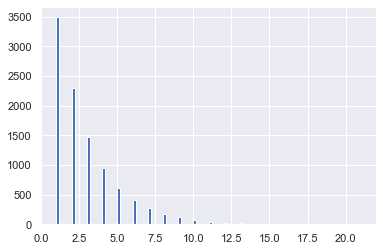

In [27]:
gm_data = rng.geometric(0.35, 10**4)
plt.hist(gm_data, bins=100);

### The ECDF of the geometric distribution

Let's also plot the ECDF of our generated data:

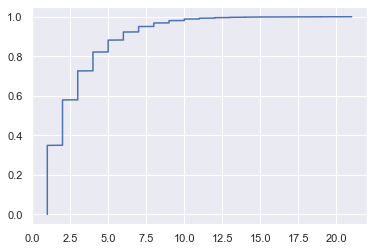

In [28]:
# Compute ECDFs for sample
x, y = ecdf(gm_data)
# Plot sample ECDF
plt.plot(x, y);

### The relationship between distributions: simulating the geometric from first principles


Now let's simulate the geometric distribution from first principles by 

- simulating Bernoulli trails and
- counting the number of trials between successes.

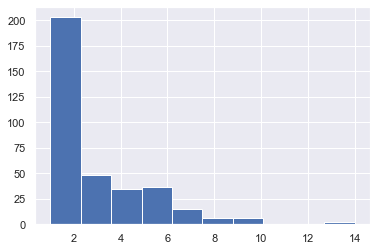

In [29]:
x = np.random.binomial(1, 0.35, 10**3)
events = np.where(x == 1)

# counting the number of trials between successes
data1 = events[0]
data = np.diff(data1).astype(float)
plt.hist(data);

We can now compute the mean and sample from a geometric distribution with that mean and then compute the ECDFs for the sample and the model, as we have done before:

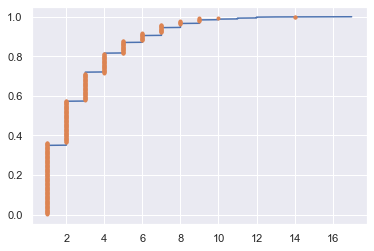

In [30]:
# Compute mean and sample from geometric
p = 1/np.mean(data)
samples = rng.geometric(p,10**3)

# Compute ECDFs for sample & model
x, y = ecdf(data)
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none');

## Log-normal distribution

### The lognormal story

We say that a distribution is Log-normally distributed when the log of the distribution is Normally distributed.



### The Parameters

The Log-normal distribution has two parameters: a location parameter $\mu$ and a scale parameter $\sigma,$ just like the Normal distribution. These are the mean and variance of the log distribution, respectively.

### Simulating the Log-normal distribution

Let's now simulate the log-normal distribution and plot the resulting histogram:

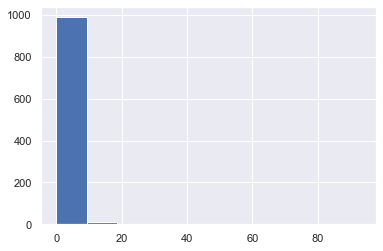

In [31]:
samples = rng.lognormal(0 ,1 , 10**3)
plt.hist(samples);

### The ECDF of the lognormal distribution


Let's also plot the ECDF, as we often do:

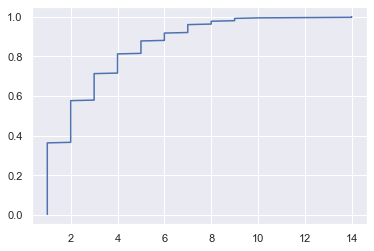

In [32]:
x_s, y_s = ecdf(samples)
plt.plot(x, y);

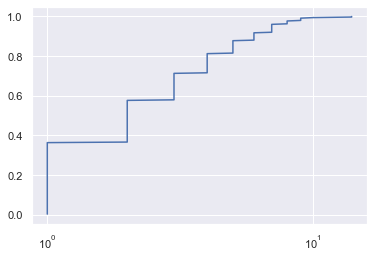

In [33]:
x_s, y_s = ecdf(samples)
plt.plot(x, y)
plt.xscale('log');

### An example of the log-normal distribution

As an example, we'll consider the distribution of adult weights. This example is from _Think Stats_ by Allen Downey. When introducing the data, Downey states

> The National Center for Chronic Disease Prevention and Health Promotion conducts an annual survey as part of the Behavioral Risk Factor Surveillance System (BRFSS).3 In 2008, they interviewed 414,509 respondents and asked about their demographics, health, and health risks. Among the data they collected are the weights in kilograms of 398,484 respondents. 

Let's now import it and check it out:

In [34]:
df = pd.read_csv('../../datasets/weights.csv')
df.head()

,Unnamed: 0,age,sex,wtyrago,finalwt,wtkg2,htm3
0,0,82.0,2,76.363636,185.870345,70.91,157.0
1,1,65.0,2,72.727273,126.603027,72.73,163.0
2,2,48.0,2,NaN,181.063210,NaN,165.0
3,3,61.0,1,73.636364,517.926275,73.64,170.0
4,4,26.0,1,88.636364,1252.624630,88.64,185.0


We'll now transform the data so that we have the logarithm of the weights and we'll fit a normal distribution to the logarithm:

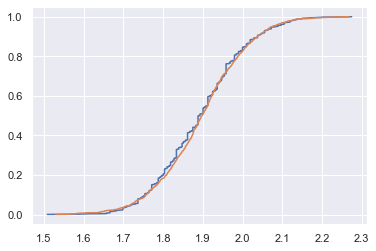

In [35]:
weights = df.wtkg2.dropna()
log_weights = np.log10(weights)

m = np.mean(log_weights)
sd = np.std(log_weights, ddof=1)

samples = np.random.normal(m ,sd, 10**3)

x, y = ecdf(np.array(log_weights))
x_s, y_s = ecdf(samples)
plt.plot(x, y)
plt.plot(x_s, y_s);

Looks like a pretty good fit to us!

## Wrapping up

In this chapter, we have introduced a panoply of distributions that will provide a firm foundation for any future statistical modeling. In particular, we have focused on matching distributions to their stories, in order to give intuition for how we think about these distributions and how they correspond to the way we encode the data-generating processes in our modeling choices.

We've seen how many of the datasets are related and used our simulation skills to demonstrate these relationships. We've also looked at a variety of real-world datasets, considered what data-generating processes could have resulted in them, fit the relevant models to the data, and used the ECDF to visualize the data and the model together, in order to get a visual sense of the goodness of fit.

Now we have a stronger sense of our foundational family of distributions, it's time to move onto Bayesian inference, through the wonderful world of joint probabilities, conditional probabilities, and Bayes' Theorem.